In [1]:
import warnings
warnings.filterwarnings('ignore')

# IMPORT LIBRARYS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# IMPORT FILE

In [3]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.shape

(200, 4)

# CLEANING AND PRE-PROCESSING

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

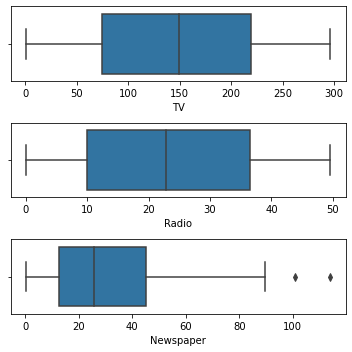

In [7]:
fig, axs = plt.subplots(3, figsize = (5,5))
sns.boxplot(x="TV",data=data, ax=axs[0])
sns.boxplot(x="Radio",data=data, ax=axs[1])
sns.boxplot(x="Newspaper",data=data, ax=axs[2])
plt.tight_layout()

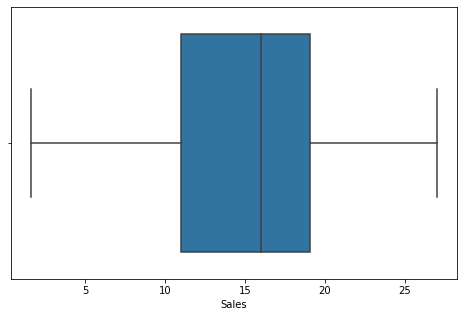

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Sales",data=data)
plt.show()

# EXPLORATORY DATA ANALYTICS

In [9]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


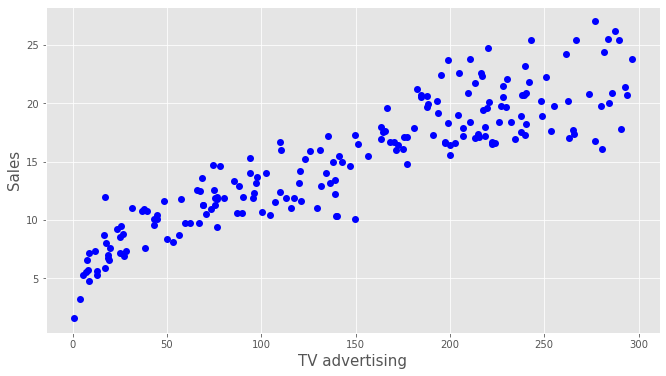

In [10]:
plt.figure(figsize=(11,6))
style.use("ggplot")
plt.scatter(data['TV'],data['Sales'], c='b', marker=".", s=100, linewidth=2)
plt.xlabel("TV advertising", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.show()

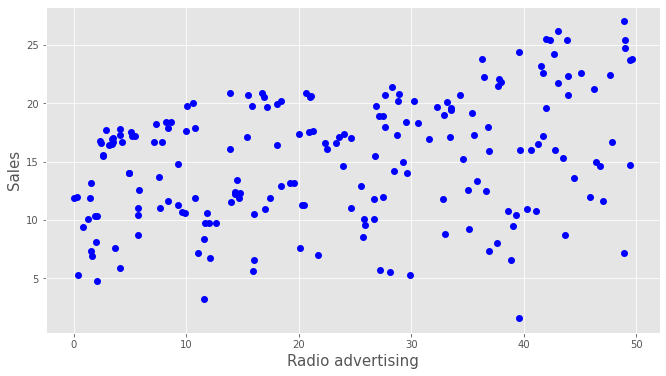

In [11]:
plt.figure(figsize=(11,6))
style.use("ggplot")
plt.scatter(data['Radio'],data['Sales'], c='b', marker=".", s=100, linewidth=2)
plt.xlabel("Radio advertising", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.show()

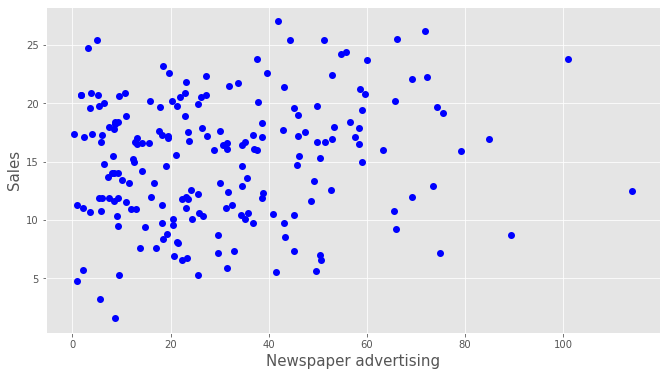

In [12]:
plt.figure(figsize=(11,6))
style.use("ggplot")
plt.scatter(data['Newspaper'],data['Sales'], c='b', marker=".", s=100, linewidth=2)
plt.xlabel("Newspaper advertising", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.show()

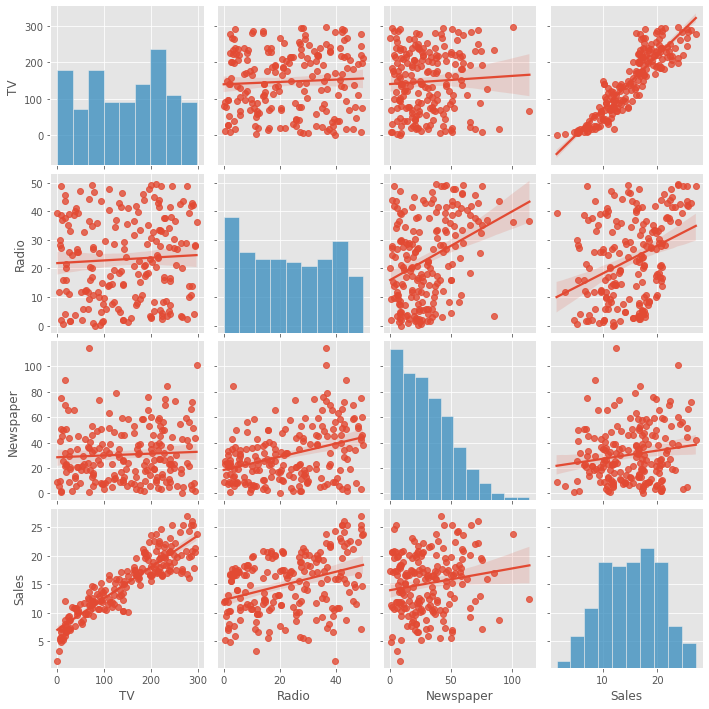

In [13]:
sns.pairplot(data=data, kind = 'reg')
plt.show()

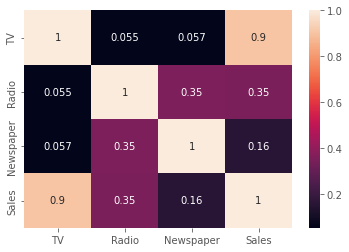

In [14]:
sns.heatmap(data.corr(), annot=True)
plt.show()

# SPLIT THE DATASET

In [15]:
x = data.drop('Sales', axis=1)
y = data['Sales']

print("Shape of X = ",x.shape)
print("Shape of Y = ",y.shape)

Shape of X =  (200, 3)
Shape of Y =  (200,)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

print("Shape of X_train = ", x_train.shape)
print("Shape of X_test = ", x_test.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of y_test = ", y_test.shape)

Shape of X_train =  (140, 3)
Shape of X_test =  (60, 3)
Shape of y_train =  (140,)
Shape of y_test =  (60,)


# MODEL EVALUATION

In [17]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
linear_regression_score = linear_regression.score(x_test, y_test)
linear_regression_score

0.9052057285496888

In [18]:
y_pred = linear_regression.predict(x_test)

In [19]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 1.9946758056330063
Root Mean Squared Error: 1.4123299209579205
R-squared: 0.9052057285496888


In [20]:
lasso = Lasso()

lasso.fit(x_train, y_train)
lasso_score = lasso.score(x_test, y_test)
lasso_score

0.904918858258784

In [21]:
ridge = Ridge()

ridge.fit(x_train, y_train)
ridge_score = ridge.score(x_test, y_test)
ridge_score

0.9052041579594177

In [22]:
support_vector = SVR(kernel='linear')

support_vector.fit(x_train, y_train)
support_vector_score = support_vector.score(x_test, y_test)
support_vector_score

0.9067614139653252

In [23]:
decision_tree = DecisionTreeRegressor(criterion='squared_error')

decision_tree.fit(x_train, y_train)
decision_tree_score = decision_tree.score(x_test, y_test)
decision_tree_score

0.890077801492665

In [24]:
random_forest = RandomForestRegressor()

random_forest.fit(x_train, y_train)
random_forest_score = random_forest.score(x_test, y_test)
random_forest_score

0.9279677298586859

In [25]:
KNN = KNeighborsRegressor()

KNN.fit(x_train, y_train)
KNN_score = KNN.score(x_test, y_test)
KNN_score

0.8960464548942494

# PREDICTION MODEL AND ASSOCIATED SCORES

In [26]:
score_table = pd.DataFrame({"Prediction Model":['Linear Regression', 'Lasso', 'Ridge', 'Support Vector Regression', 
                                    'Decision Tree Regressor', 'Random Forest Regressor', 'K-Neighbors Regressor'], 
              "Score":[linear_regression_score, lasso_score, ridge_score, support_vector_score, decision_tree_score,
                      random_forest_score, KNN_score]})
score_table

,Prediction Model,Score
0,Linear Regression,0.905206
1,Lasso,0.904919
2,Ridge,0.905204
3,Support Vector Regression,0.906761
4,Decision Tree Regressor,0.890078
5,Random Forest Regressor,0.927968
6,K-Neighbors Regressor,0.896046


# PREDICTION

In [27]:
y_pred = random_forest.predict(x_test)

In [28]:
prediction_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction_table.head()

,Actual,Predicted
112,17.1,17.447
165,16.9,17.173
12,9.2,8.662
73,11.0,12.355
144,12.3,11.230
